# Project: Investigate a Dataset: TMDB MOVIES
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
## Questions
> Which genres are more popular and generate more revenue?
>
> Which director generates the highest average revenue?
>
> Is there a correlation between movie popularity and revenue?

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# import packages
import pandas as pd
import numpy as np
from IPython.display import HTML
%matplotlib inline

In [2]:
# load CSV file
df = pd.read_csv('tmdb-movies.csv', sep=',')

In [3]:
# shows a sample of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# shows the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Cleaning data

In [5]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [6]:
# to see the number of NULL values per column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Only the records with genres or director = Null will affect my analysis, therefor I only drop the records with genres or director = Null.
popularity, release_year and revenue_adj columns have no issues and the other columns will not be part of the analysis so there is no need to clean them.

In [7]:
# drop rows with genres = Null or director = null
df.dropna(subset=['genres','director'], inplace=True)
df.shape

(10800, 21)

In [8]:
# verify unique values of genres, director and release_year for possibly errant data
HTML(pd.DataFrame(df['genres'].unique()).to_html())

,0
0,Action|Adventure|Science Fiction|Thriller
1,Adventure|Science Fiction|Thriller
2,Action|Adventure|Science Fiction|Fantasy
3,Action|Crime|Thriller
4,Western|Drama|Adventure|Thriller
5,Science Fiction|Action|Thriller|Adventure
6,Drama|Adventure|Science Fiction
7,Family|Animation|Adventure|Comedy
8,Comedy|Animation|Family
9,Action|Adventure|Crime


In [9]:
HTML(pd.DataFrame(df['director'].unique()).to_html())

,0
0,Colin Trevorrow
1,George Miller
2,Robert Schwentke
3,J.J. Abrams
4,James Wan
5,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6,Alan Taylor
7,Ridley Scott
8,Kyle Balda|Pierre Coffin
9,Pete Docter


In [10]:
HTML(pd.DataFrame(df['release_year'].unique()).to_html())

,0
0,2015
1,2014
2,1977
3,2009
4,2010
5,1999
6,2001
7,2008
8,2011
9,2002


In [11]:
# saving cleaned tmdb-movies-clean.csv
df.to_csv('tmdb-movies-clean.csv', index=False)

In [12]:
# Creating a subset of genres, popularity and revenue
df_genres = df[['id','popularity','revenue_adj','genres']]

In [13]:
# separating genres string into a list
def split_genre(row) -> list:
    return row['genres'].split('|')

df_genres['genres_list'] = df_genres.apply(split_genre, axis=1)
df_genres.head()
# the message below is just a warning generated by jupyter notebook

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,popularity,revenue_adj,genres,genres_list
0,135397,32.985763,1.392446e+09,Action|Adventure|Science Fiction|Thriller,"[Action, Adventure, Science Fiction, Thriller]"
1,76341,28.419936,3.481613e+08,Action|Adventure|Science Fiction|Thriller,"[Action, Adventure, Science Fiction, Thriller]"
2,262500,13.112507,2.716190e+08,Adventure|Science Fiction|Thriller,"[Adventure, Science Fiction, Thriller]"
3,140607,11.173104,1.902723e+09,Action|Adventure|Science Fiction|Fantasy,"[Action, Adventure, Science Fiction, Fantasy]"
4,168259,9.335014,1.385749e+09,Action|Crime|Thriller,"[Action, Crime, Thriller]"


## Transposing genres list into rows

In [14]:
# creating an empty dataframe for the transpossed data
dtypes = np.dtype([('id', np.int64),('popularity', float),('revenue_adj', float),('genre', str),])
data = np.empty(0, dtype=dtypes)
df_genre = pd.DataFrame(data)
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
id             0 non-null int64
popularity     0 non-null float64
revenue_adj    0 non-null float64
genre          0 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 76.0+ bytes


In [15]:
# transposing genres_list into rows
for row in df_genres.itertuples():
    for genre_name in row.genres_list:
        df_genre = df_genre.append({'id':row.id, 'popularity':row.popularity, 'revenue_adj':row.revenue_adj,'genre':genre_name},ignore_index=True )
df_genre.head()

,id,popularity,revenue_adj,genre
0,135397,32.985763,1.392446e+09,Action
1,135397,32.985763,1.392446e+09,Adventure
2,135397,32.985763,1.392446e+09,Science Fiction
3,135397,32.985763,1.392446e+09,Thriller
4,76341,28.419936,3.481613e+08,Action


In [16]:
# saving genre dataframe genres.csv
df_genre.to_csv('genres.csv', index=False)

In [17]:
# grouping by genre to create bar charts
df_genre_grouped = df_genre.groupby('genre',as_index=False)[['popularity','revenue_adj']].mean()
df_genre_grouped.head()

,genre,popularity,revenue_adj
0,Action,0.928310,9.198979e+07
1,Adventure,1.157736,1.421584e+08
2,Animation,0.858912,8.611854e+07
3,Comedy,0.593915,4.803336e+07
4,Crime,0.745331,5.667827e+07


## Transposing director list into rows

In [18]:
# Creating a subset of director and revenue
df_directors = df[['id','popularity','revenue_adj','director']]

In [19]:
# Separating director string into a list
def split_director(row) -> list:
    return row['director'].split('|')

df_directors['director_list'] = df_directors.apply(split_director, axis=1)
df_directors.head()
# the message below is just a warning generated by jupyter notebook

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,popularity,revenue_adj,director,director_list
0,135397,32.985763,1.392446e+09,Colin Trevorrow,[Colin Trevorrow]
1,76341,28.419936,3.481613e+08,George Miller,[George Miller]
2,262500,13.112507,2.716190e+08,Robert Schwentke,[Robert Schwentke]
3,140607,11.173104,1.902723e+09,J.J. Abrams,[J.J. Abrams]
4,168259,9.335014,1.385749e+09,James Wan,[James Wan]


In [20]:
# creating an empty dataframe for the transpossed data
dtypes = np.dtype([('id', np.int64),('popularity', float),('revenue_adj', float),('director', str),])
data = np.empty(0, dtype=dtypes)
df_director = pd.DataFrame(data)
df_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
id             0 non-null int64
popularity     0 non-null float64
revenue_adj    0 non-null float64
director       0 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 76.0+ bytes


In [21]:
# transposing director_list into rows
for row in df_directors.itertuples():
    for director_name in row.director_list:
        df_director = df_director.append({'id':row.id, 'popularity':row.popularity, 'revenue_adj':row.revenue_adj,'director':director_name},ignore_index=True )
df_director.head()

,id,popularity,revenue_adj,director
0,135397,32.985763,1.392446e+09,Colin Trevorrow
1,76341,28.419936,3.481613e+08,George Miller
2,262500,13.112507,2.716190e+08,Robert Schwentke
3,140607,11.173104,1.902723e+09,J.J. Abrams
4,168259,9.335014,1.385749e+09,James Wan


In [22]:
# saving director dataframe genres.csv
df_director.to_csv('directors.csv', index=False)

In [23]:
# grouping by director to create bar charts
df_director_grouped = df_director.groupby('director',as_index=False)[['popularity','revenue_adj']].mean()
df_director_grouped.head()

,director,popularity,revenue_adj
0,FrÃ©dÃ©ric Jardin,0.434506,3.255239e+03
1,A. Todd Smith,1.876037,0.000000e+00
2,A.R. Murugadoss,0.215030,7.697178e+07
3,Aaron Aites,0.108700,0.000000e+00
4,Aaron Blaise,1.653031,2.963382e+02


<a id='eda'></a>
## Exploratory Data Analysis

### Distribution of popularity, budget and revenue of the available data

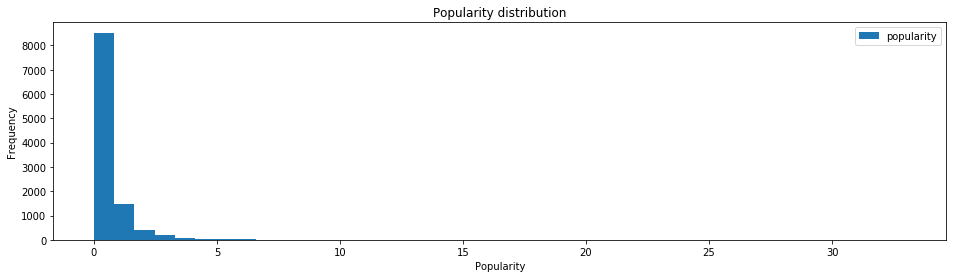

In [24]:
#df.hist('popularity', bins=20,title='Popularity distribution');
df.plot(y='popularity',kind='hist',title='Popularity distribution',bins=40,figsize=(16, 4)).set_xlabel('Popularity');

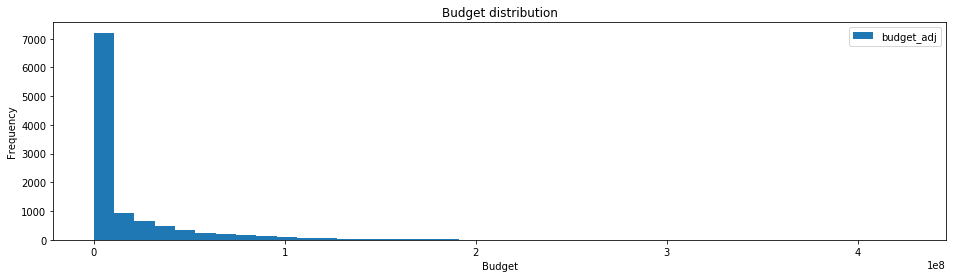

In [25]:
df.plot(y='budget_adj',kind='hist',title='Budget distribution',bins=40,figsize=(16, 4)).set_xlabel('Budget');

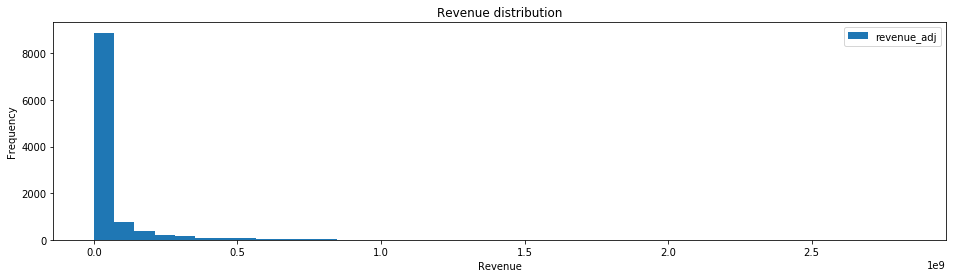

In [26]:
df.plot(y='revenue_adj',kind='hist',title='Revenue distribution',bins=40,figsize=(16, 4)).set_xlabel('Revenue');

Popularity, revenue and budget are spread across a wide range of values but most os the samples for all 3 measures are concentrated in the lower range.

### Research Question 1: Which genres are more popular and generate more revenue?

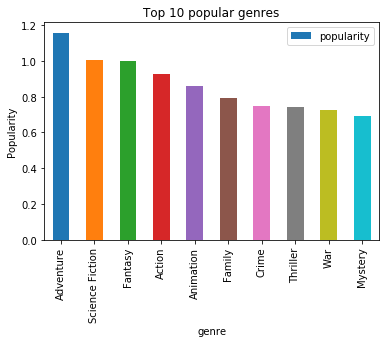

In [27]:
# genre popularity chart, plotting only top 10 genres by popularity
df_genre_grouped.sort_values(['popularity'],ascending=False)[:10].plot.bar(x='genre', y='popularity', title='Top 10 popular genres').set_ylabel('Popularity');

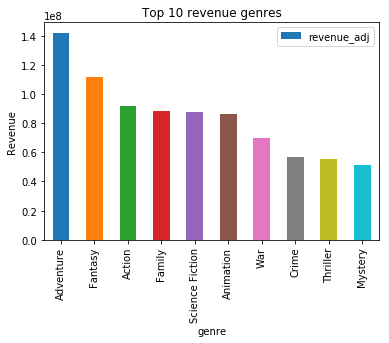

In [28]:
# genre revenue chart, plotting only top 10 genres by revenue
df_genre_grouped.sort_values(['revenue_adj'],ascending=False)[:10].plot.bar(x='genre', y='revenue_adj', title='Top 10 revenue genres').set_ylabel('Revenue');

The 4 most popular categories in order are Adventure, Science Fiction, Fantasy and action
The 4 categories with more revenue in order are Adventure, Fantasy, action and Family
Notice that family is within the top 4 in revenue but not in the top 4 in popularity and Science Fiction is the second most popular but is not within the top 4 categories in revenue.
Finally Adventure is the most popular category and the one with most revenue.

### Research Question 2: Which director generates the highest average revenue?

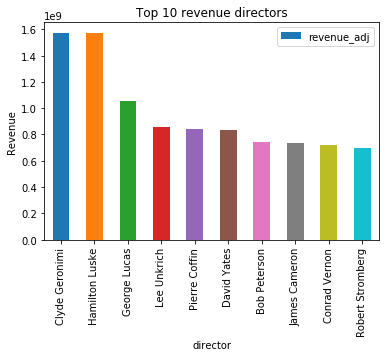

In [29]:
# director revenue chart, plotting only top 10 directors by revenue
df_director_grouped.sort_values(['revenue_adj'],ascending=False)[:10].plot.bar(x='director', y='revenue_adj', title='Top 10 revenue directors').set_ylabel('Revenue');

The director with the highest average revenue is Clyde Geronimi closely followed by Hamilton Luske.

### Research Question 3: Is there a correlation between movie popularity and revenue?

Text(0, 0.5, 'Revenue')

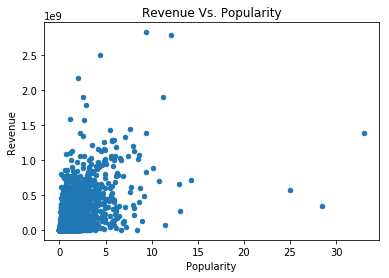

In [30]:
# popularity vs revenue scatter chart
df_plot = df.plot(x='popularity', y='revenue_adj', kind='scatter', title='Revenue Vs. Popularity');
df_plot.set_xlabel('Popularity')
df_plot.set_ylabel('Revenue')

Surprisingly enough the popularity vs revenue scatter chart doesn't show a correlation between both variables.

<a id='conclusions'></a>
## Conclusions
> Adventure is the genre with highest average revenue and popularity in the sample data that was analyzed. 

> The director with the highest average revenue is Clyde Geronimi closely followed by Hamilton Luske, interestingly both worked in several Disney movies.

> The most interesting finding from this sample data is that there is no visible correlation between popularity and revenue.

### Limitations

> There were not many null, missing or erroneous values that could affect the analisys but, not knowing how this data was gathered reduces the reliability of the conclusions regarding poularity because popularity is a subjective value, for example: is all popularity samples were taken around the same year then older movies may present lower popularity or if they were taken in a Disney theme park then Disney movies may present higher poularity, in the same manner if all the people sampled in this study are of a younger age then the popularity will be inclined towards certain genres.
>
> The limitations that I see with this data are not related to the data itself but to the lack of knowledge of how this info was obtained.
>
> Revenue and budget samples are spread across a wide range of values but most of the samples are concentrated in the lower range, sometimes is advisable to remove the outlying samples but in this case we are looking for maximun revenue and popularity values so the outlying values are needed.